# Loan Prediction (AnalyticsVidhya)

### Import Libraries

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read Data

In [246]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## Data Exploration

#### Checking distribution of the target variable

In [233]:
sns.set_style("darkgrid")

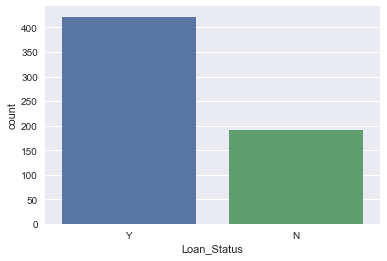

In [234]:
sns.countplot(x='Loan_Status',data=df_train)

In [250]:
temp = df_train.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status']]

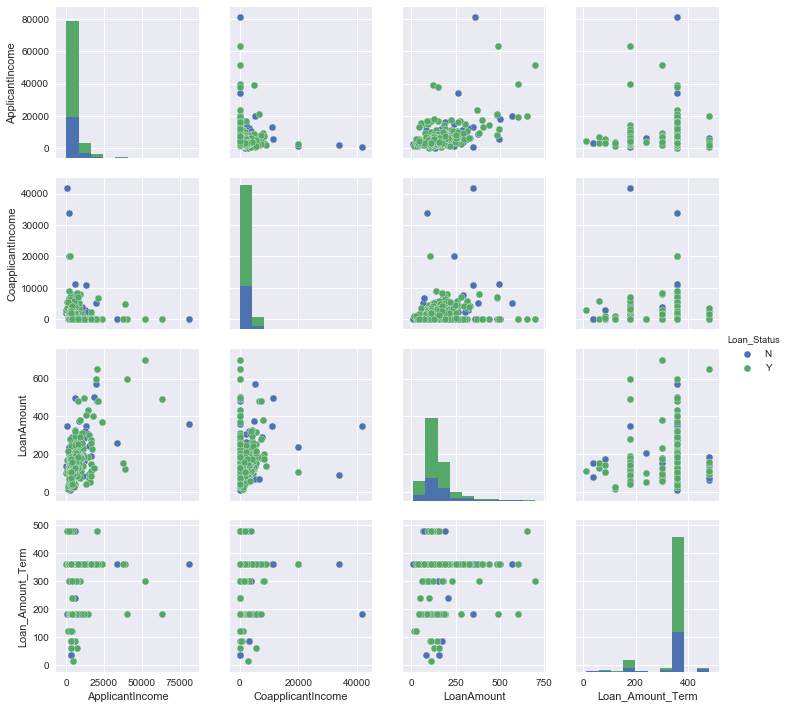

In [256]:
sns.pairplot(temp.dropna(), hue='Loan_Status')

### Data Cleaning

In [181]:
y = df_train["Loan_Status"]

In [182]:
df_train["trainFlag"] = 1
df_test["trainFlag"] = 0
df = pd.concat([df_train.drop('Loan_Status', axis = 1), df_test])

Seperating categorical and numerical columns for missing data treatment

In [183]:
df.drop('Loan_ID', axis=1, inplace=True)
cat_df = df.select_dtypes(include=['object'])
cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [193]:
num_df = df.select_dtypes(exclude=['object'])
num_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,trainFlag
0,5849,0.0,NaN,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,1
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


Filling Missing Categorical Column values with the most frequent value

In [185]:
cat_df = cat_df.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 6 columns):
Gender           981 non-null object
Married          981 non-null object
Dependents       981 non-null object
Education        981 non-null object
Self_Employed    981 non-null object
Property_Area    981 non-null object
dtypes: object(6)
memory usage: 53.6+ KB


Converting Categorical Variables to Dummy Variables

In [186]:
cat_df = pd.get_dummies(cat_df, drop_first=True)
cat_df.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1
3,1,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,1


Imputing Numerical Columns

In [187]:
from sklearn.preprocessing import Imputer

In [188]:
imp = Imputer(strategy="median")

In [189]:
num_columns = num_df.columns

In [190]:
imp.fit(num_df)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [194]:
num_df = imp.transform(num_df)

In [195]:
num_df = pd.DataFrame(num_df,columns=num_columns)
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 6 columns):
ApplicantIncome      981 non-null float64
CoapplicantIncome    981 non-null float64
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Credit_History       981 non-null float64
trainFlag            981 non-null float64
dtypes: float64(6)
memory usage: 46.1 KB


In [201]:
df = pd.concat([cat_df.reset_index(),num_df],axis=1)
df.drop('index',axis=1,inplace=True)
df.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,trainFlag
0,1,0,0,0,0,0,0,0,1,5849.0,0.0,126.0,360.0,1.0,1.0
1,1,1,1,0,0,0,0,0,0,4583.0,1508.0,128.0,360.0,1.0,1.0
2,1,1,0,0,0,0,1,0,1,3000.0,0.0,66.0,360.0,1.0,1.0
3,1,1,0,0,0,1,0,0,1,2583.0,2358.0,120.0,360.0,1.0,1.0
4,1,0,0,0,0,0,0,0,1,6000.0,0.0,141.0,360.0,1.0,1.0


Combining Applicant and Coapplicant Income as a single Total Income

In [202]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [203]:
df.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,Loan_Amount_Term,Credit_History,trainFlag,TotalIncome
0,1,0,0,0,0,0,0,0,1,126.0,360.0,1.0,1.0,5849.0
1,1,1,1,0,0,0,0,0,0,128.0,360.0,1.0,1.0,6091.0
2,1,1,0,0,0,0,1,0,1,66.0,360.0,1.0,1.0,3000.0
3,1,1,0,0,0,1,0,0,1,120.0,360.0,1.0,1.0,4941.0
4,1,0,0,0,0,0,0,0,1,141.0,360.0,1.0,1.0,6000.0


In [225]:
train = df.loc[df.trainFlag == 1, df.columns != 'trainFlag']
test = df.loc[df.trainFlag == 0, df.columns != 'trainFlag']

## Model Training

### 1. Logistic Regression

In [208]:
from sklearn.linear_model import LogisticRegression

In [209]:
lm = LogisticRegression()

In [210]:
lm.fit(train,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [211]:
pred = lm.predict(train)

#### Checking Accuracy on Train Dataset

In [212]:
from sklearn.metrics import confusion_matrix,classification_report

In [213]:
print(confusion_matrix(y,pred))

[[ 82 110]
 [  8 414]]


In [214]:
print(classification_report(y,pred))

             precision    recall  f1-score   support

          N       0.91      0.43      0.58       192
          Y       0.79      0.98      0.88       422

avg / total       0.83      0.81      0.78       614



In [215]:
lm.score(train,y)

0.80781758957654726

Preparing Submission to solution checker on AnalyticsVidhya

In [216]:
pred = lm.predict(test)

In [217]:
final = df_test
final['Loan_Status'] = pred
final = final[["Loan_ID",'Loan_Status']]

In [218]:
final.to_csv("submission.csv")

** LeaderBoard Score: 0.777778**

** Rank: 502-751 **